In [36]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [37]:
X_train = pd.read_csv('../Joep/X_train.csv', sep = ',')
y_train = pd.read_csv('../Joep/y_train.csv', sep = ',')

X_test = pd.read_csv('../Joep/X_test.csv', sep = ',')
y_test = pd.read_csv('../Joep/y_test.csv', sep = ',')


/tmp/ipykernel_17177/2531075767.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 training score: 0.9687203791469194
 testing score: 0.7621951219512195


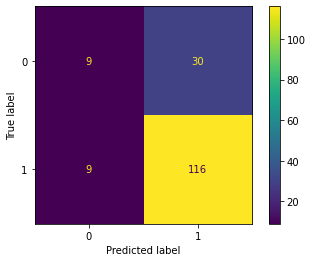

In [38]:
# Predict y data with classifier: 
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)



y_predict = model.predict(X_test)

model.score(X_test, y_test)

print(' training score: {}'.format(model.score(X_train, y_train)))
print(' testing score: {}'.format(model.score(X_test, y_test)))

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict, labels=[0, 1]).ravel()
print(tn, fp, fn, tp)


FalseNegativeRate= fp/(fp+tp)

print('False negative rate: %.3f' %(FalseNegativeRate))

9 30 9 116
False negative rate: 0.205


In [40]:
#accuracy score

predict = model.predict(X_train)
accuracyTrain = accuracy_score(y_train, predict)


accuracy = accuracy_score(y_test, y_predict)

print('Accuracy test set: %.3f' %(accuracy*100))
print('Accuracy train set: %.3f' %(accuracyTrain*100))


Accuracy test set: 76.220
Accuracy train set: 96.872


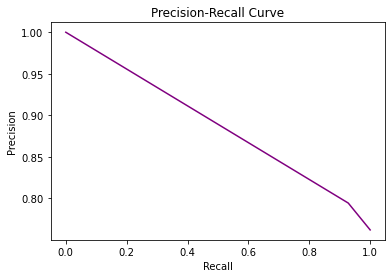

In [41]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


In [42]:
def evaluating(Xtest,ytest, Xtrain, ytrain):
    y_predict = model.predict(X_test)
    model.score(X_test, y_test)
    print(' training score: {}'.format(model.score(X_train, y_train)))
    print(' testing score: {}'.format(model.score(X_test, y_test)))
    
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_test, y_predict, labels=[0, 1]).ravel()
    print(tn, fp, fn, tp)
    FalseNegativeRate= fp/(fp+tp)
    print('False negative rate: %.3f' %(FalseNegativeRate))

    predict = model.predict(X_train)
    accuracyTrain = accuracy_score(y_train, predict)
    accuracy = accuracy_score(y_test, y_predict)
    print('Accuracy test set: %.3f' %(accuracy*100))
    print('Accuracy train set: %.3f' %(accuracyTrain*100))

    precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    plt.show()
    